### Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) are a type of neural network designed for processing sequential data. They are particularly useful in tasks where the context or the order of the data points is important, such as language modeling or time series prediction.

#### Mathematical Background

The core idea behind RNNs is the use of a hidden state $( h_t )$ that captures information about the sequence up to time step $t$. This hidden state is updated recursively as new inputs from the sequence are processed. The basic update equation for the hidden state in a simple RNN is:

$$
h_t = \sigma(W_{hh} h_{t-1} + W_{hx} x_t + b_h)
$$

Where:
- $( h_t )$ is the hidden state at time $( t )$
- $( h_{t-1} )$ is the hidden state at time $( t-1 )$
- $( x_t )$ is the input at time step $( t )$
- $W_{hh}$ is the weight matrix for the hidden state
- $W_{hx}$ is the weight matrix for the input
- $b_h$ is the bias
- $\sigma$ is the activation function, typically a non-linear function like tanh or ReLU

#### Example

Let's consider a numerical example with the following parameters:
- Initial hidden state, $h_0 = 0$
- Input at time step 1, $x_1 = 1$
- Weight matrices and bias initialized to 1

The update for $h_1$ would be computed as follows:

$$
h_1 = \sigma(1 \cdot 0 + 1 \cdot 1 + 1) = \sigma(2)
$$

If we use the tanh activation function:

$$
h_1 = \tanh(2) \approx 0.96
$$

This simple example demonstrates how the RNN uses its recurrent structure to update the hidden state based on both the new input and the previous hidden state.


### Backpropagation Through Time (BPTT)

Backpropagation Through Time (BPTT) is an adaptation of the standard backpropagation algorithm used to train traditional neural networks, tailored specifically for the sequential nature of RNNs. This learning rule addresses the challenge of temporal dependencies in sequence data.

#### Forward Pass

During the forward pass, the RNN computes its hidden states and outputs sequentially for each time step:

$$
h_t = \sigma(W_{hh} h_{t-1} + W_{hx} x_t + b_h)
$$
$$
y_t = \sigma(W_{hy} h_t + b_y)
$$

Where:
- $h_t$ is the hidden state at time $t$
- $x_t$ is the input at time step $t$
- $y_t$ is the output at time step $t$
- $W_{hh}, W_{hx}, W_{hy}$ are the weight matrices
- $b_h, b_y$ are the biases
- $\sigma$ is the activation function

#### Loss Calculation

The loss for a single time step can be a function like mean squared error or cross-entropy, and the total loss over all time steps is typically the sum of these individual losses:

$$
L = \sum_{t=1}^T L_t(y_t, \hat{y}_t)
$$

Where $L_t$ is the loss at time step $t$, $y_t$ is the predicted output, and $\hat{y}_t$ is the actual output.

#### Backward Pass

The backward pass involves calculating the gradients of the loss function with respect to the network parameters. The gradients are computed for each time step, starting from the last and moving to the first:

$$
\frac{\partial L}{\partial W} = \sum_{t=1}^T \frac{\partial L_t}{\partial W}
$$

Here, the gradient of the loss with respect to the weights $W$ is computed by summing over the gradients at each time step, accounting for the influence of $W$ at every step in the sequence.

#### Weight Update

The weights are updated using gradient descent or any of its variants (e.g., Adam, RMSprop):

$$
W = W - \eta \frac{\partial L}{\partial W}
$$

Where $\eta$ is the learning rate.

This iterative process allows the RNN to learn complex sequences and patterns, taking into account the influence of prior inputs through its internal state and feedback loops.


### Numerical Example of BPTT

Let's walk through a basic numerical example to illustrate the BPTT process. Consider an RNN with one input unit, one hidden unit, and one output unit. Assume the following parameters and inputs:

- Input at time step 1: $x_1 = 0.5$
- Initial hidden state: $h_0 = 0.0$
- Weights and biases initialized as:
  - $W_{hx} = 0.1$, $W_{hh} = 0.5$, $b_h = 0.1$
  - $W_{hy} = 1.0$, $b_y = 0.0$
- Activation function: $\sigma(x) = \tanh(x)$ for hidden state and output
- Learning rate, $\eta = 0.01$
- Target output at time step 1: $\hat{y}_1 = 1$

#### Forward Pass

Calculate the hidden state and output at time step 1:

$$
h_1 = \tanh(0.1 \times 0.5 + 0.5 \times 0.0 + 0.1) = \tanh(0.06) \approx 0.05987
$$
$$
y_1 = \tanh(1.0 \times 0.05987 + 0.0) = \tanh(0.05987) \approx 0.05986
$$

#### Loss Calculation

Using mean squared error for the loss:

$$
L = \frac{1}{2} (\hat{y}_1 - y_1)^2 = \frac{1}{2} (1 - 0.05986)^2 \approx 0.4418
$$

#### Backward Pass

Calculate the gradient of the loss with respect to the output and then backpropagate to the weights:

$$
\frac{\partial L}{\partial y_1} = -(1 - y_1) \approx -0.94014
$$
$$
\frac{\partial L}{\partial W_{hy}} = \frac{\partial L}{\partial y_1} \cdot h_1 = -0.94014 \times 0.05987 \approx -0.05625
$$

#### Weight Update

Update the weight $W_{hy}$ using gradient descent:

$$
W_{hy} = W_{hy} - \eta \frac{\partial L}{\partial W_{hy}} = 1.0 - 0.01 \times -0.05625 \approx 1.00056
$$

This example demonstrates how the RNN's weights are updated based on the loss gradient calculated through BPTT. This simple example focuses on a single time step to illustrate the computation clearly.


# Recurrent Neural Networks (RNNs)

## Key Properties of RNNs

- **Memory**: RNNs have internal memory that helps them capture information about what has been processed so far. This allows them to make use of past information in current decisions.
- **Parameter Sharing Across Time**: The same weights and biases are used for each input in the sequence, significantly reducing the number of parameters and the complexity of the model.
- **Handling Variable Length Input**: RNNs can process inputs of varying lengths, which is ideal for tasks like language processing where sentences can vary significantly in length.
- **Flexible Output Types**: RNNs can produce a range of outputs from a single vector to a sequence of vectors, making them versatile for various tasks such as classification or sequence generation.

## Drawbacks of RNNs

- **Vanishing and Exploding Gradients**: As gradients are backpropagated through the network, they can become vanishingly small or excessively large, making the network hard to train.
- **Computational Intensity**: The sequential nature of RNNs limits the possibility of parallelizing certain computations, which can result in longer training times.
- **Prone to Overfitting**: Especially in cases with small datasets, RNNs can easily overfit, necessitating techniques like dropout for regularization.
- **Difficulty in Capturing Long-Term Dependencies**: Despite their theoretical capability, practical implementations of RNNs often struggle with learning dependencies from long input sequences due to the vanishing gradient issue.

## Bias-Variance Trade-off in RNNs

- **Bias**: Represents the error that is introduced by approximating a complex real-world problem with a simpler model. RNNs with high bias may underfit the data, failing to capture essential patterns (often seen with overly simplistic models).
- **Variance**: Refers to the error from sensitivity to small fluctuations in the training data. RNNs with high variance may overfit the training data, capturing noise as if it were signal (common in overly complex models).
- **Trade-off**: Achieving a balance between bias and variance is critical in model training to ensure good generalization. Often, techniques like adding/removing layers, increasing the size of the hidden state, or applying different forms of regularization are used to manage this trade-off.

### Example of Adjusting Bias and Variance
- Reducing overfitting (high variance): Introduce dropout layers or increase data regularization.
- Addressing underfitting (high bias): Add more recurrent layers or increase the complexity of the model.


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt


In [9]:
# Generate sine wave data
time = np.arange(0, 100, 0.1)
data = np.sin(time)

# Function to create sequences
def create_sequences(data, time_steps=10):
    xs, ys = [], []
    for i in range(len(data) - time_steps):
        x = data[i:(i + time_steps)]
        y = data[i + time_steps]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Prepare training and testing data
time_steps = 10
X, y = create_sequences(data, time_steps)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [10]:
# Build the model
model = Sequential([
    SimpleRNN(50, input_shape=(time_steps, 1), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [11]:
# Reshape input for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)


Epoch 1/20
23/23 [==============================] - 4s 38ms/step - loss: 0.0886 - val_loss: 0.0214
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0038
Epoch 3/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 4/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/20
23/23 [==============================] - 0s 10ms/step - loss: 7.9479e-04 - val_loss: 5.4530e-04
Epoch 6/20
23/23 [==============================] - 0s 8ms/step - loss: 4.8066e-04 - val_loss: 3.5078e-04
Epoch 7/20
23/23 [==============================] - 0s 9ms/step - loss: 3.0715e-04 - val_loss: 2.5506e-04
Epoch 8/20
23/23 [==============================] - 0s 9ms/step - loss: 2.3235e-04 - val_loss: 2.0397e-04
Epoch 9/20
23/23 [==============================] - 0s 11ms/step - loss: 1.9549e-04 - val_loss: 1.8178e-04
Epoch 10/20
23/23 [==============================] - 0s 9ms/step - loss: 1.

7/7 [==============================] - 0s 3ms/step


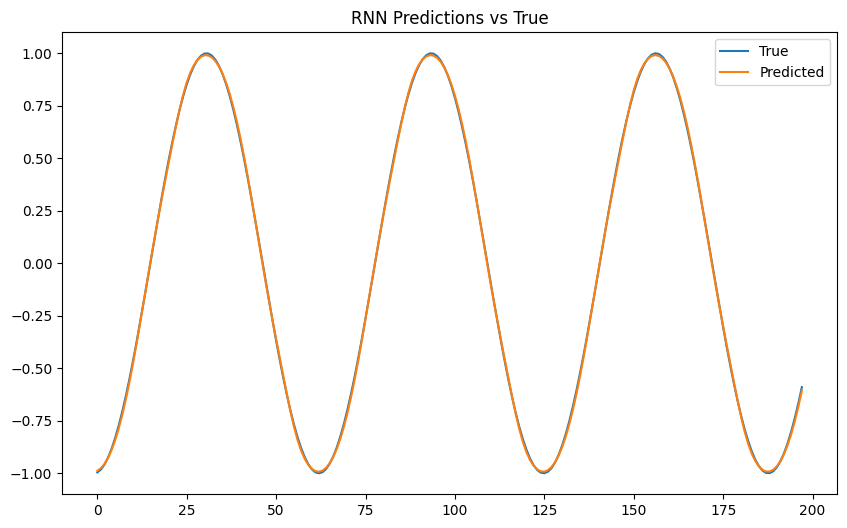

In [12]:
# Predict and plot the results
predictions = model.predict(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.title('RNN Predictions vs True')
plt.legend()
plt.show()
